The ONLY way to understand TensorFlow is by watching the following video:

<iframe width="560" height="315" src="https://www.youtube.com/embed/N_X9fPauWfI" frameborder="0" allowfullscreen></iframe>

Now, I can safely assume that we are at the same level of understanding. Ready to fire up some tensors?

# What is TensorFlow?

TensorFlow is a library for number crunching created and maintained by Google. It's used mainly for machine learning (especially deep learning) tasks. While still in beta (version 1.0 is currently in alpha), the library was open sourced more than a year ago (November 9, 2015). Since then it pretty much took the Deep Learning (DL) community by a storm. Tons of companies are using it in production, also. The best place to learn more is the official page of [TensorFlow](https://www.tensorflow.org/).

On the more technical side, TensorFlow allows you to do computations on your PC/Mac (CPU & GPU), Android, iOS and lots more places. Of course, being created by Google, it aims to bring massive parallelism to your backprop musings. The main abstraction behind all the magic is [stateful dataflow graphs](https://arxiv.org/pdf/1603.04467.pdf).

![Sample dataflow graph](https://www.tensorflow.org/images/tensors_flowing.gif)

## Eh, Tensors?

The [glossary](https://www.tensorflow.org/resources/glossary#glossary) of TensorFlow states that a tensor is:

> A Tensor is a typed multi-dimensional array. For example, a 4-D array of floating point numbers representing a mini-batch of images with dimensions [batch, height, width, channel].

So, you can think of a tensor as a matrix on steroids - expanded to $n$ more dimensions. The concept might feel a bit strange at first, but don't worry it will come around eventually.

# Installing TensorFlow

If you want basic installation without all the fuss, just do this:

``` 
pip install tensorflow 
```

Or install it with GPU support:

``` 
pip install tensorflow-gpu
```

Otherwise, you might have a look [here](https://www.tensorflow.org/get_started/os_setup) if you want to build from source (might need this if you want to support custom cuDNN version) or whatever.

## Check your setup

Now that you have everything installed. Let's check that we can import TensorFlow.

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
tf.__version__

'1.0.0-alpha'

Success! As you can see, I am using version 1.0 alpha. Let's get those tensors flowing.

# Bringing the big guns

Writing TensorFlow code might require some getting use to at first. There are some concepts that you must familiarize yourself with.

## Variables

Variables are pretty standard stuff. You just have to remember one thing - define them before using them in the computational graph.

## Placeholders

Placeholders are used to feed in data from outside the computational graph. So, if you need to pass data to the model from outside TensorFlow, you have to define a placeholder. Each placeholder must specify a data type. You specify your data using `feed_dict` when running your computation.

## Session

In order to run any meaningful operation on your graph, you need a Session. In sessions, we trust (not cookies), most of the time. Here is a short example:

In [111]:
v1 = tf.Variable(0.0)
p1 = tf.placeholder(tf.float32)
new_val = tf.add(v1, c1)
update = tf.assign(v1, new_val)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(5):
        sess.run(update, feed_dict={p1: 1.0})
    print(sess.run(v1))

5.0


# Simple Linear Regression in TensorFlow

This very well known model is a good way to start your exploration in TensorFlow. It is described by the following equation:

$$Y = aX + b$$

Where Y is the dependent and X is the independent variable.  Our task is to adjust the parameters a - "slope" and b - "intercept" so that we best describe the data using a line.

For our example, let's find out how eating burgers affect your resting heart rate. The data will be simulated, so no conclusions, please! Our data represents the average number of burgers eaten per day.

In [41]:
X = np.random.rand(100).astype(np.float32)

The slope and intercept we are looking for are respectively $a = 50$ and $b = 40$.

In [47]:
a = 50
b = 40
Y = a * X + b

Let's have a look at what our model should figure out:

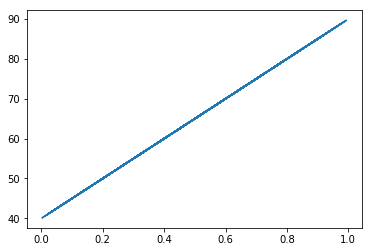

In [43]:
plt.plot(X, Y);

Let's make things a tiny bit more interesting by adding a bit of noise to our dependent variable.

In [45]:
Y = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.05))(Y)

In [49]:
a_var = tf.Variable(1.0)
b_var = tf.Variable(1.0)
y_var = a_var * X + b_var

Our task will be to minimize the mean squared error or in TensorFlow parlance - reduce the mean.

In [50]:
loss = tf.reduce_mean(tf.square(y_var - Y))

So, let's try to minimize it using gradient descent.

In [51]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

Let's use our optimizer for `300` steps of learning

In [86]:
TRAINING_STEPS = 300
results = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(TRAINING_STEPS):
        results.append(sess.run([train, a_var, b_var])[1:])

Let's get the final and best predictions for $a$ and $b$

In [102]:
final_pred = results[-1]
a_hat = final_pred[0]
b_hat = final_pred[1]
y_hat = a_hat * X + b_hat

print("a:", a_hat, "b:", b_hat)

a: 50.0 b: 40.0


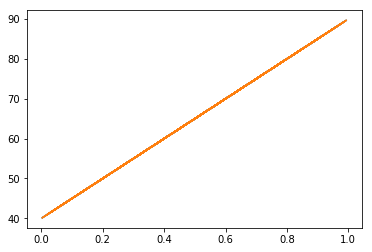

In [103]:
plt.plot(X, Y);
plt.plot(X, y_hat);

That's a nice fit. Pretty good for a couple of lines of code.

# What we've done so far

There you have it. Eating hamburgers affect your health in a bad way (probably that one is true). Most importantly, you know a bit of TensorFlow and how to do a simple linear regression. Next up - deep neural networks.

# References

[Getting to Know TensorFlow](https://hackernoon.com/machine-learning-with-tensorflow-8873fdee2b68#.ehj5202b0) <br/>
[Learning TensorFlow Basics](http://learningtensorflow.com/lesson2/) <br/>
[Deep Learning with TensorFlow](https://bigdatauniversity.com/courses/deep-learning-tensorflow/)